<IPython.core.display.Javascript object>


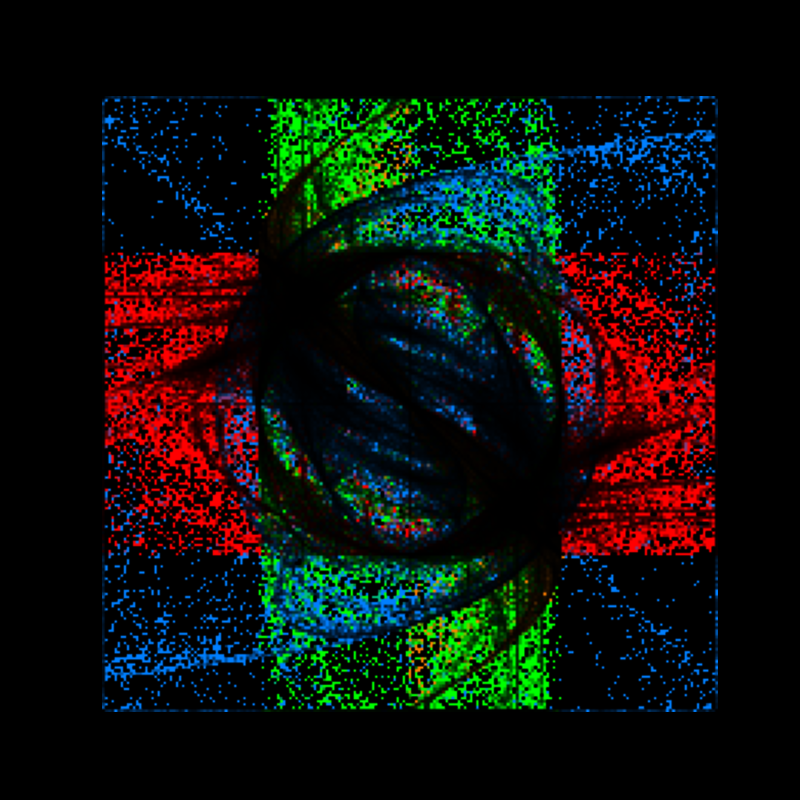

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total runtime: 13.347324459813535


In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
import numpy as np
import random
from random import seed
from random import randint
from random import shuffle

plt.style.use('dark_background')

start = time.perf_counter()

class MakeFire:
    def __init__(self, numPoints, bins):
        fig = plt.figure(figsize = (8,8))
        self.ax = fig.add_subplot(111)
#         self.ax2 = fig.add_subplot(211)
#         self.ax3 = fig.add_subplot(212)
        plt.axis('off')
        
        self.bins = bins
        self.numPoints = numPoints - (numPoints %4)
        self.ranLst = [1,2,3,4] *(self.numPoints //4)
        self.colArr = np.zeros((self.bins +1,self.bins +1,3))
        self.binArr = np.zeros((self.bins +1,self.bins +1,1))
        self.xVal = random.uniform(0,1)
        self.yVal = random.uniform(0,1)
        self.xBin = int(self.xVal *100)
        self.yBin = int(self.yVal *100)
        self.col = [0,0,0]
        self.r = ((self.xVal **2)+(self.yVal **2)) **.5
        self.r2 = ((self.xVal **2)+(self.yVal **2))
        shuffle(self.ranLst)
        
    def pickFunc(self, i):
        ran = self.ranLst[i]
        if ran == 1:
            self.r = ((self.xVal **2)+(self.yVal **2)) **.5
            self.r2 = ((self.xVal **2)+(self.yVal **2))
            self.xVal = self.xVal / self.r
            self.yVal = self.yVal / self.r2
            self.col = [1,0,0]
        elif ran == 2:
            self.r = ((self.xVal **2)+(self.yVal **2)) **.5
            self.r2 = ((self.xVal **2)+(self.yVal **2))
            self.xVal = self.xVal / self.r2
            self.yVal = self.yVal / self.r
            self.col = [0,1,0]
        elif ran == 3:
            self.r2 = ((self.xVal **2)+(self.yVal **2))
            self.xVal = self.xVal *np.sin(self.r2) - self.yVal *np.cos(self.r2)
            self.yVal = self.xVal *np.cos(self.r2) + self.yVal *np.sin(self.r2)
            self.col = [0,0.5,1]
        elif ran == 4:
            self.r = ((self.xVal **2)+(self.yVal **2)) **.5
            self.xVal = (2 *self.yVal) / (self.r +1)
            self.yVal = (2 *self.xVal) / (self.r +1)
            self.col = [1,0.5,0]
    
    def addToCol(self):
        self.colArr[self.xBin][self.yBin] = (self.colArr[self.xBin][self.yBin] + self.col) / self.binArr[self.xBin][self.yBin]
        
    def addToBin(self):
        self.binArr[self.xBin][self.yBin] += 1
        
    def newPoint(self, i):
        self.pickFunc(i)
        self.xBin = max(min(int(self.xVal *(self.bins /4)),(self.bins //2)) +(self.bins //2),0)
        self.yBin = max(min(int(self.yVal *(self.bins /4)),(self.bins //2)) +(self.bins //2),0)

        self.addToBin()
        self.addToCol()

    def addPoints(self):
        for i in range(self.numPoints):
            self.newPoint(i)
    
    def showFire(self):
        self.addPoints()
        totArr = np.dstack((self.colArr,self.binArr))
#         totArr2 = np.roll(totArr,1,axis = 0)
#         totArr3 = np.roll(totArr,1,axis = 1)
#         totArr4 = np.roll(totArr,-1,axis = 0)
#         totArr5 = np.roll(totArr,-1,axis = 1)
#         totArr22 = np.roll(totArr,2,axis = 0)
#         totArr32 = np.roll(totArr,2,axis = 1)
#         totArr42 = np.roll(totArr,-2,axis = 0)
#         totArr52 = np.roll(totArr,-2,axis = 1)
        self.ax.imshow(totArr, interpolation='hanning')
#         self.ax.imshow(totArr2, interpolation='hanning')
#         self.ax.imshow(totArr3, interpolation='hanning')
#         self.ax.imshow(totArr4, interpolation='hanning')
#         self.ax.imshow(totArr5, interpolation='hanning')
#         self.ax.imshow(totArr22, interpolation='hanning')
#         self.ax.imshow(totArr32, interpolation='hanning')
#         self.ax.imshow(totArr42, interpolation='hanning')
#         self.ax.imshow(totArr52, interpolation='hanning')
#         self.ax2.imshow(totArr, interpolation='hanning')
#         self.ax3.imshow(totArr, interpolation='quadric')
#         plt.savefig('flame.png', dpi = 400, bbox_inches='tight', pad_inches=.1)
        plt.show()

simulation = MakeFire(1000000,200)
simulation.showFire()

end = time.perf_counter()

print("Total runtime:", (end - start))

In [ ]:
### PLAYING AROUND WITH COLOR AVERAGING

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
import numpy as np
import random
from random import seed
from random import randint
from random import shuffle

plt.style.use('dark_background')

start = time.perf_counter()

class MakeFire:
    def __init__(self, numPoints, bins):
        fig = plt.figure(figsize = (8,8))
        self.ax = fig.add_subplot(111)
#         self.ax2 = fig.add_subplot(211)
#         self.ax3 = fig.add_subplot(212)
        plt.axis('off')
        
        self.bins = bins
        self.numPoints = numPoints - (numPoints %4)
        self.ranLst = [1,2,3,4] *(self.numPoints //4)
        self.colArr = np.zeros((self.bins +1,self.bins +1,3))
        self.binArr = np.zeros((self.bins +1,self.bins +1,1))
        self.xVal = random.uniform(0,1)
        self.yVal = random.uniform(0,1)
        self.xBin = int(self.xVal *100)
        self.yBin = int(self.yVal *100)
        self.col = [0,0,0]
        self.r = ((self.xVal **2)+(self.yVal **2)) **.5
        self.r2 = ((self.xVal **2)+(self.yVal **2))
        shuffle(self.ranLst)
        
    def pickFunc(self, i):
        ran = self.ranLst[i]
        if ran == 1:
            self.r = ((self.xVal **2)+(self.yVal **2)) **.5
            self.xVal = self.xVal / self.r
            self.yVal = self.yVal / self.r
            self.col = [1,0,0]
        elif ran == 2:
            self.r2 = ((self.xVal **2)+(self.yVal **2))
            self.xVal = self.xVal / self.r2
            self.yVal = self.yVal / self.r2
            self.col = [0,1,0]
        elif ran == 3:
            self.r2 = ((self.xVal **2)+(self.yVal **2))
            self.xVal = self.xVal *np.sin(self.r2) - self.yVal *np.cos(self.r2)
            self.yVal = self.xVal *np.cos(self.r2) + self.yVal *np.sin(self.r2)
            self.col = [0,.5,1]
        elif ran == 4:
            self.r2 = ((self.xVal **2)+(self.yVal **2))
            self.xVal = self.xVal *np.sin(self.r2) - self.xVal *np.cos(self.r2)
            self.yVal = self.yVal *np.cos(self.r2) + self.yVal *np.sin(self.r2)
            self.col = [1,0.5,0]
    
    def addToCol(self):
        self.colArr[self.xBin][self.yBin] = (self.colArr[self.xBin][self.yBin] + self.col) / self.binArr[self.xBin][self.yBin]
        
    def addToBin(self):
        self.binArr[self.xBin][self.yBin] += 1
        
    def newPoint(self, i):
        self.pickFunc(i)
        self.xBin = max(min(int(self.xVal *self.bins *4 /15),self.bins //2) +self.bins //2,0)
        self.yBin = max(min(int(self.yVal *self.bins *4 /15),self.bins //2) +self.bins //2,0)

        self.addToBin()
        self.addToCol()

    def addPoints(self):
        for i in range(self.numPoints):
            self.newPoint(i)
    
    def showFire(self):
        self.addPoints()
        totArr = np.dstack((self.colArr,self.binArr))
#         totArr2 = np.roll(totArr,1,axis = 0)
#         totArr3 = np.roll(totArr,1,axis = 1)
#         totArr4 = np.roll(totArr,-1,axis = 0)
#         totArr5 = np.roll(totArr,-1,axis = 1)
#         totArr22 = np.roll(totArr,2,axis = 0)
#         totArr32 = np.roll(totArr,2,axis = 1)
#         totArr42 = np.roll(totArr,-2,axis = 0)
#         totArr52 = np.roll(totArr,-2,axis = 1)
        self.ax.imshow(totArr)
#         self.ax.imshow(totArr2, interpolation='hanning')
#         self.ax.imshow(totArr3, interpolation='hanning')
#         self.ax.imshow(totArr4, interpolation='hanning')
#         self.ax.imshow(totArr5, interpolation='hanning')
#         self.ax.imshow(totArr22, interpolation='hanning')
#         self.ax.imshow(totArr32, interpolation='hanning')
#         self.ax.imshow(totArr42, interpolation='hanning')
#         self.ax.imshow(totArr52, interpolation='hanning')
#         self.ax2.imshow(totArr, interpolation='hanning')
#         self.ax3.imshow(totArr, interpolation='quadric')
#         plt.savefig('flame2_mi.png', dpi = 400, bbox_inches='tight', pad_inches=.1)
        plt.show()

simulation = MakeFire(100000,600)
simulation.showFire()

end = time.perf_counter()

print("Total runtime:", (end - start))

<IPython.core.display.Javascript object>


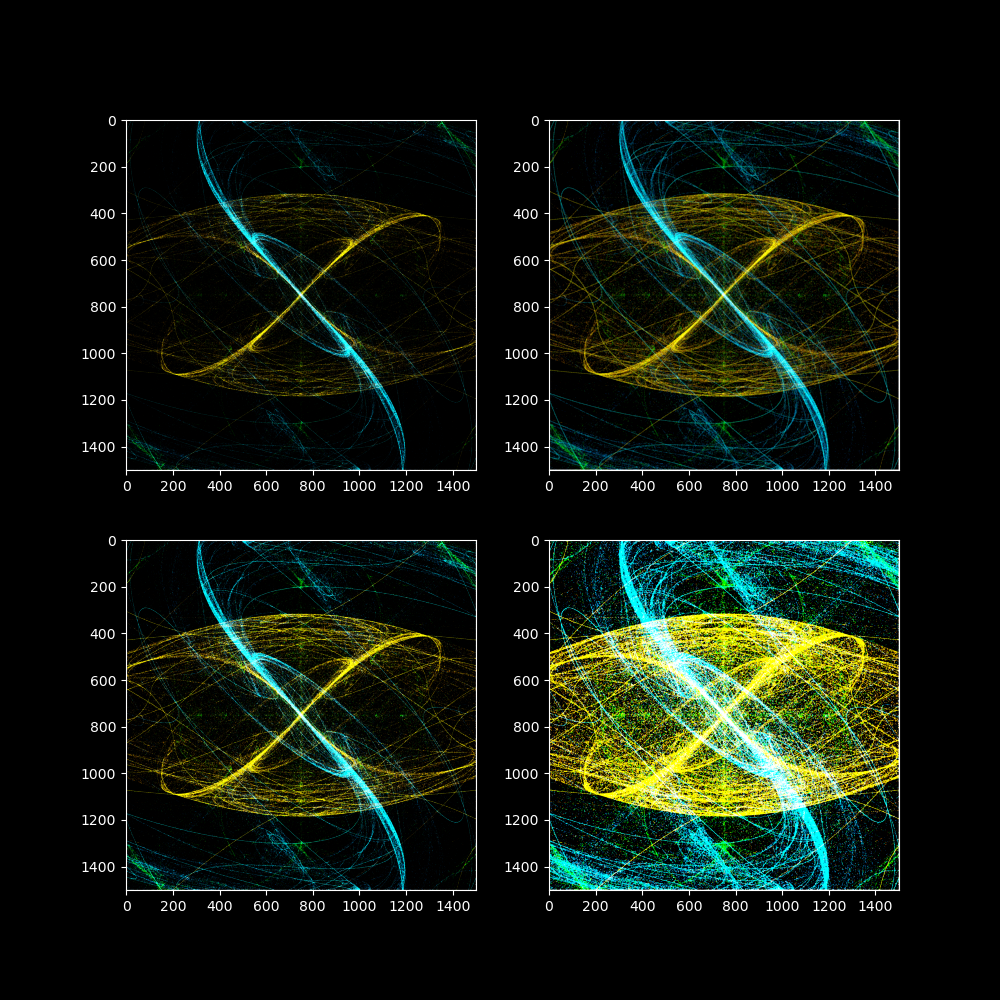

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Total runtime: 121.69327930000145


In [124]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
import numpy as np
import random
from random import seed
from random import randint
from random import shuffle

plt.style.use('dark_background')

start = time.perf_counter()

class MakeFire:
    def __init__(self, numPoints, bins):
        fig = plt.figure(figsize = (10,10))
        self.ax = fig.add_subplot(221)
        self.ax2 = fig.add_subplot(222)
        self.ax3 = fig.add_subplot(223)
        self.ax4 = fig.add_subplot(224)
#         plt.axis('off')
        
        self.bins = bins
        self.numPoints = numPoints - (numPoints %4)
        self.ranLst = [1,2,3,4] *(self.numPoints //4)
        self.colArr = np.zeros((self.bins +1,self.bins +1,3))
        self.binArr = np.zeros((self.bins +1,self.bins +1,1))
        self.xVal = random.uniform(0,1)
        self.yVal = random.uniform(0,1)
        self.xBin = int(self.xVal *100)
        self.yBin = int(self.yVal *100)
        self.col = [0,0,0]
        self.r = ((self.xVal **2)+(self.yVal **2)) **.5
        self.r2 = ((self.xVal **2)+(self.yVal **2))
        shuffle(self.ranLst)
        
    def pickFunc(self, i):
        ran = self.ranLst[i]
        if ran == 1:
            self.r = ((self.xVal **2)+(self.yVal **2)) **.5
            self.xVal = self.xVal / self.r
            self.yVal = self.yVal / self.r
            self.col = [1,0,0]
        elif ran == 2:
            self.r2 = ((self.xVal **2)+(self.yVal **2))
            self.xVal = self.xVal / self.r2
            self.yVal = self.yVal / self.r2
            self.col = [0,1,0]
        elif ran == 3:
            self.r2 = ((self.xVal **2)+(self.yVal **2))
            self.xVal = self.xVal *np.sin(self.r2) - self.yVal *np.cos(self.r2)
            self.yVal = self.xVal *np.cos(self.r2) + self.yVal *np.sin(self.r2)
            self.col = [0,0.5,1]
        elif ran == 4:
            self.r2 = ((self.xVal **2)+(self.yVal **2))
            self.xVal = self.xVal *np.sin(self.r2) - self.xVal *np.cos(self.r2)
            self.yVal = self.yVal *np.cos(self.r2) + self.yVal *np.sin(self.r2)
            self.col = [1,0.5,0]
    
    def addToCol(self):
        self.colArr[self.xBin][self.yBin] = (self.colArr[self.xBin][self.yBin] + self.col)
        
    def addToBin(self):
        self.binArr[self.xBin][self.yBin] += 1
        
    def newPoint(self, i):
        self.pickFunc(i)
        self.xBin = max(min(int(self.xVal *self.bins *4 /5),self.bins //2) +self.bins //2,0)
        self.yBin = max(min(int(self.yVal *self.bins *4 /5),self.bins //2) +self.bins //2,0)

        self.addToCol()
        self.addToBin()

    def addPoints(self):
        for i in range(self.numPoints):
            self.newPoint(i)
    
    def showFire(self):
        self.addPoints()
        totArr = np.dstack((self.colArr,self.binArr))
        totArr2 = np.roll(totArr,1,axis = 0)
        totArr3 = np.roll(totArr,1,axis = 1)
        totArr4 = np.roll(totArr,-1,axis = 0)
        totArr5 = np.roll(totArr,-1,axis = 1)
        totArr22 = np.roll(totArr,(1,1),axis = (0,1))
        totArr32 = np.roll(totArr,(-1,1),axis = (0,1))
        totArr42 = np.roll(totArr,(1,-1),axis = (0,1))
        totArr52 = np.roll(totArr,(-1,-1),axis = (0,1))
        totArrSum1 = totArr + totArr2 + totArr3 +totArr4 + totArr5 + totArr22 +totArr32 + totArr42 + totArr52
        totArrSum2 = totArr + totArr2
        self.ax.imshow(totArr)
        self.ax2.imshow(totArr)
        self.ax2.imshow(totArr2)
        self.ax2.imshow(totArr3)
        self.ax2.imshow(totArr4)
        self.ax2.imshow(totArr5)
        self.ax2.imshow(totArr22)
        self.ax2.imshow(totArr32)
        self.ax2.imshow(totArr42)
        self.ax2.imshow(totArr52)
        self.ax3.imshow(totArrSum2)
        self.ax4.imshow(totArrSum1)
#         self.ax4.imshow(totArr, interpolation='hanning')
#         self.ax4.imshow(totArr2, interpolation='hanning')
#         self.ax4.imshow(totArr3, interpolation='hanning')
#         self.ax4.imshow(totArr4, interpolation='hanning')
#         self.ax4.imshow(totArr5, interpolation='hanning')
#         self.ax4.imshow(totArr22, interpolation='hanning')
#         self.ax4.imshow(totArr32, interpolation='hanning')
#         self.ax4.imshow(totArr42, interpolation='hanning')
#         self.ax4.imshow(totArr52, interpolation='hanning')
#         self.ax2.imshow(totArr, interpolation='hanning')
#         self.ax4.imshow(totArr, interpolation='quadric')
#         plt.savefig('flame2_higherRe.png', dpi = 400, bbox_inches='tight', pad_inches=.1)
        plt.show()

simulation = MakeFire(10000000,1500)
simulation.showFire()

end = time.perf_counter()

print("Total runtime:", (end - start))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


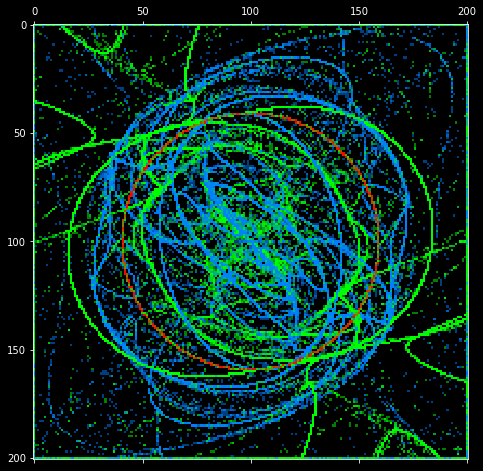

Total runtime: 20.807988799999976


In [13]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
import numpy as np
import random
from random import seed
from random import randint

plt.style.use('dark_background')

start = time.perf_counter()

class DefinePoint(object):
    def __init__(self, x, y, c=[0,0,0]):
        self.x = x
        self.y = y
        self.c = c
        self.r = ((self.x **2)+(self.y **2)) **.5
        self.r2 = ((self.x **2)+(self.y **2))
        
    def pickFunc(self):
        seed()
        ran = randint(1,3)
        if ran == 1:
            self.x = self.x / self.r
            self.y = self.y / self.r
            self.c = [1,0,0]
        elif ran == 2:
            self.x = self.x / self.r2
            self.y = self.y / self.r2
            self.c = [0,1,0]
        elif ran == 3:
            self.x = self.x *np.sin(self.r2) - self.y *np.cos(self.r2)
            self.y = self.x *np.cos(self.r2) + self.y *np.sin(self.r2)
            self.c = [0,0.5,1]
        return self.x, self.y, self.c


class MakeFire:
    def __init__(self, numPoints):
        fig = plt.figure(figsize = (8,8))
        self.ax = fig.add_subplot()
        
        self.numPoints = numPoints
        self.colArr = np.zeros((201,201,3))
        self.binArr = np.zeros((201,201,1))
        self.xVal = random.uniform(0,1)
        self.yVal = random.uniform(-1,1)
        self.xBin = int(self.xVal *20)
        self.yBin = int(self.yVal *20)
        self.col = [0,0,0]
    
    def addToCol(self):
        self.colArr[self.xBin][self.yBin] = (self.colArr[self.xBin][self.yBin] + self.col) /2
        
    def addToBin(self):
        self.binArr[self.xBin][self.yBin] += 1
        
    def newPoint(self):
        pointObj = DefinePoint(self.xVal,self.yVal)
        self.xVal, self.yVal, self.col = pointObj.pickFunc()
        self.xBin = max(min(int(self.xVal *60),100) +100,0)
        self.yBin = max(min(int(self.yVal *60),100) +100,0)

        self.addToCol()
        self.addToBin()

    def addPoints(self):
        for i in range(self.numPoints):
            self.newPoint()
    
    def showFire(self):
        self.addPoints()
        totArr = np.dstack((self.colArr,self.binArr))
        self.ax.matshow(totArr)
        plt.show()
        
simulation = MakeFire(1000000)
simulation.showFire()

end = time.perf_counter()

print("Total runtime:", (end - start))